In [8]:
import numpy as np
import pandas as pd
import networkx as nx
import pickle 
import causallearn as cl
import cdt
import os
import matplotlib.pyplot as plt

This script focuses on learning graphs for each of the conditions using different structure learning algorithms. Two types of algorithms are used - score based greedy algorithms and conditional independence test based algorithms

# Data Formatting

In [2]:
path = os.getcwd()+"/normalized data/"

In [3]:
genes_oi = pd.read_csv(path+'genes_of_interest.csv')
resp_df = pd.read_csv(path+'respiratory_data.csv')
resp_meta = pd.read_csv(path+'respiratory_metadata.csv')

In [4]:
resp_ctrl = resp_df[(resp_df['genes'].isin(genes_oi['genes'].to_list()))][['genes']+resp_meta[resp_meta['condition'] == "healthy_ctrl"]['sample'].to_list()]

resp_ctrl = resp_ctrl.T
resp_ctrl.columns = resp_ctrl.loc['genes']
resp_ctrl.drop(['genes'], axis = 0, inplace = True)
resp_ctrl.head()

genes,ABCB4,KCNS2,FAM122C,EEF1A1,HK1,TYSND1,UBE2L6,ZDHHC5,ZFAND3,ZNF689,...,IDI1,UGT2B4,SP100,BATF,DPY19L4,N6AMT1,CLDN17,CLDN8,TSPAN7,SFXN2
DU09.02S12199,8.60946,0.276787,10.149809,20.074937,14.793398,12.396356,15.705099,14.284227,14.266921,11.25781,...,12.50961,0.062,14.99055,12.06713,9.030494,9.823865,2.429848,0.123329,6.052428,10.24945
DU09.02S12209,9.31309,0.277517,10.076433,20.21612,14.742148,12.78215,15.533075,14.133876,13.949301,11.264738,...,12.45029,0.062136,14.69819,11.86985,8.324703,9.99135,2.429848,0.12365,5.744056,10.49297
DU09.02S14204,8.76911,0.273449,10.628984,20.158191,14.820189,12.459832,15.732451,14.185265,14.076187,11.370606,...,12.45171,0.061381,14.93722,11.75091,8.591946,10.0364,2.429848,0.121865,5.847794,10.38134
DU09.02S16961,8.477817,0.275281,10.658328,19.613571,14.957094,12.418269,15.926953,14.30138,14.087791,11.54704,...,12.57871,0.061721,15.26074,11.67115,8.712135,9.883983,2.429848,0.122669,5.815546,10.33049
DU09.02S16973,8.906522,0.277465,10.568379,20.195166,14.704025,12.594751,15.591891,14.059612,13.982028,11.004117,...,12.45054,0.062126,14.6316,12.39947,8.421966,10.32762,2.429848,0.123627,6.381675,10.63727


causal learn is not working!

In [5]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz
cg = pc(data = np.array(resp_ctrl.iloc[:,:50]), alpha = 0.01, indep_test = fisherz, stable = True, uc_rule = 0,\
       uc_priority = 0)

AttributeError: 'float' object has no attribute 'shape'

In [62]:
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.cit import fisherz
G = fci(np.array(resp_ctrl.iloc[:,:50]), fisherz, 0.01, 1)

Starting Fast Adjacency Search.


AttributeError: 'float' object has no attribute 'shape'

trying causal discovery toolbox

In [5]:
from cdt.causality.graph import PC
from cdt.data import load_dataset
data, graph = load_dataset("sachs")

In [13]:
data = resp_ctrl.iloc[:,:50]

In [20]:
import time
start = time.time()
obj = PC()
output = obj.predict(resp_ctrl.iloc[:,:100])
end = time.time()
print((end - start)/60)

8.85645296573639


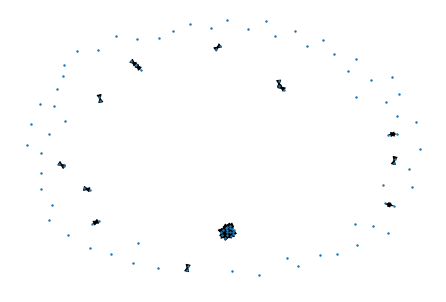

In [21]:
nx.draw(output, node_size = 2)
plt.show()